Let’s get answers to the questions below   
using basic methods that can be used not only for time series data but also for other data.
- What distribution form does each variable have?
- Are there any variables that have a close correlation?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.float_format', '{:.2f}'.format)

### Read file
- The data to be worked on is downsampled from the raw data on a weekly basis.
- raw data name : Corn, Oat, Cereals & Grains Futures Data    
  (Historical data on Cereals and Grains Futures from Yahoo Finance)
- raw data source : kaggle datasets  
  (https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures)

In [3]:
df = pd.read_csv('./data/grain_prices/all_grains_data_week_2.csv',
                sep=',', encoding='utf-8')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7194 entries, 0 to 7193
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   commodity       7194 non-null   object 
 1   week_last_date  7194 non-null   object 
 2   open            7194 non-null   float64
 3   high            7194 non-null   float64
 4   low             7194 non-null   float64
 5   close           7194 non-null   float64
 6   volume          7194 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 393.5+ KB


In [5]:
df['week_last_date'] = pd.to_datetime(df['week_last_date'])

### df.describe()
- Check the mean and variance, etc.
- Compare the variance by applying 'describe()' to each commodity.
- There is a value where volume is 0,  
  which may mean that the product has not been traded but the price remains the same,   
  or it may be an error in the data collection process.
- Considering that it means ‘a case where the product is not traded but the price remains the same’,  
  the trading volume of 0 itself can be important information.

In [6]:
df.describe()

,week_last_date,open,high,low,close,volume
count,7194,7194.00,7194.00,7194.00,7194.00,7194.00
mean,2012-03-17 23:59:59.999999744,573.95,579.56,568.64,573.94,133553.65
min,2000-09-24 00:00:00,14.43,14.45,14.42,14.43,0.00
25%,2006-06-18 00:00:00,223.58,225.78,221.43,223.16,648.50
50%,2012-03-18 00:00:00,432.90,436.48,428.65,433.34,4868.00
75%,2017-12-17 00:00:00,880.99,890.55,872.23,880.02,144594.75
max,2023-09-10 00:00:00,2396.20,2424.80,2352.90,2388.40,1741325.00
std,NaN,459.79,464.41,455.46,459.81,242908.10


In [7]:
commodities = df['commodity'].unique()

for commodity in commodities:
    print(f"Describe for commodity: {commodity}")
    display(df[df['commodity'] == commodity].describe())
    print("\n" + "-"*50 + "\n")

Describe for commodity: Corn


,week_last_date,open,high,low,close,volume
count,1199,1199.00,1199.00,1199.00,1199.00,1199.00
mean,2012-03-18 00:00:00,409.93,414.65,405.49,410.06,414136.95
min,2000-09-24 00:00:00,185.60,185.60,185.55,184.50,0.00
25%,2006-06-21 12:00:00,283.12,287.79,281.55,287.38,10294.50
50%,2012-03-18 00:00:00,371.50,375.35,367.00,371.00,390122.00
75%,2017-12-13 12:00:00,525.28,536.67,517.47,527.05,708496.50
max,2023-09-10 00:00:00,816.40,826.95,808.00,817.55,1741325.00
std,NaN,163.89,166.80,160.99,163.83,377714.90



--------------------------------------------------

Describe for commodity: KC HRW Wheat


,week_last_date,open,high,low,close,volume
count,1199,1199.00,1199.00,1199.00,1199.00,1199.00
mean,2012-03-18 00:00:00,563.69,570.65,557.15,563.39,42886.24
min,2000-09-24 00:00:00,274.60,276.60,272.50,274.00,0.00
25%,2006-06-21 12:00:00,411.73,416.62,408.15,411.98,217.50
50%,2012-03-18 00:00:00,500.60,506.95,496.00,500.40,24076.00
75%,2017-12-13 12:00:00,708.62,715.95,701.12,707.60,72038.00
max,2023-09-10 00:00:00,1337.00,1348.90,1291.15,1318.45,301223.00
std,NaN,203.03,206.72,198.99,202.38,51697.49



--------------------------------------------------

Describe for commodity: Oat


,week_last_date,open,high,low,close,volume
count,1199,1199.00,1199.00,1199.00,1199.00,1199.00
mean,2012-03-18 00:00:00,278.39,281.62,274.91,278.15,1476.68
min,2000-09-24 00:00:00,98.25,98.67,98.25,98.75,0.00
25%,2006-06-21 12:00:00,194.32,196.21,191.43,194.08,35.00
50%,2012-03-18 00:00:00,262.70,266.85,258.70,261.90,1073.00
75%,2017-12-13 12:00:00,346.20,350.65,341.14,345.75,2383.00
max,2023-09-10 00:00:00,796.38,806.31,783.50,790.94,9539.00
std,NaN,118.52,120.79,116.18,118.49,1640.53



--------------------------------------------------

Describe for commodity: Rough Rice


,week_last_date,open,high,low,close,volume
count,1199,1199.00,1199.00,1199.00,1199.00,1199.00
mean,2012-03-18 00:00:00,1157.30,1166.10,1148.68,1157.25,1920.00
min,2000-09-24 00:00:00,347.00,347.00,347.00,347.00,0.00
25%,2006-06-21 12:00:00,942.23,946.61,934.64,938.80,27.00
50%,2012-03-18 00:00:00,1198.00,1205.10,1182.50,1195.00,1505.00
75%,2017-12-13 12:00:00,1452.89,1467.08,1437.75,1451.65,3215.50
max,2023-09-10 00:00:00,2396.20,2424.80,2352.90,2388.40,11704.00
std,NaN,386.53,392.41,381.01,386.58,1973.73



--------------------------------------------------

Describe for commodity: Soybean


,week_last_date,open,high,low,close,volume
count,1199,1199.00,1199.00,1199.00,1199.00,1199.00
mean,2012-03-18 00:00:00,997.48,1007.09,989.05,997.89,236718.61
min,2000-09-24 00:00:00,421.81,422.25,421.69,422.12,7.00
25%,2006-06-21 12:00:00,740.70,748.35,737.29,742.70,5381.00
50%,2012-03-18 00:00:00,968.12,976.65,960.62,967.25,128298.00
75%,2017-12-13 12:00:00,1301.80,1319.50,1292.60,1303.17,447200.00
max,2023-09-10 00:00:00,1758.81,1766.38,1738.19,1752.05,1064783.00
std,NaN,338.15,343.32,333.26,338.14,250503.62



--------------------------------------------------

Describe for commodity: Soybean Oil


,week_last_date,open,high,low,close,volume
count,1199,1199.00,1199.00,1199.00,1199.00,1199.00
mean,2012-03-18 00:00:00,36.92,37.27,36.57,36.91,104183.41
min,2000-09-24 00:00:00,14.43,14.45,14.42,14.43,0.00
25%,2006-06-21 12:00:00,26.99,27.07,26.81,26.95,799.00
50%,2012-03-18 00:00:00,33.03,33.30,32.67,32.96,62963.00
75%,2017-12-13 12:00:00,48.69,49.09,48.27,48.57,194676.50
max,2023-09-10 00:00:00,88.22,88.67,87.23,88.29,460664.00
std,NaN,14.90,15.14,14.63,14.89,113297.78



--------------------------------------------------



### box plot
- Median: horizontal line inside the box
- Interquartile range (IQR)   
  The bottom border of the box is the 1st Quartile.  
  The top border of the box is the 3rd Quartile.  
  The height of the IQR (3rd Quartile-1st Quartile) box represents the middle 50% of the data.
- Whiskers  
  Line segments extending from the top and bottom of the box.  
  From Q1 it extends downward by '1.5 * IQR'.  
  From Q3 it extends upward by '1.5 * IQR'.
- Outliers
  Values more than '1.5 * IQR' away from Q1 and Q3.  
- The expression range of whiskers and outliers can be adjusted using the 'whis' argument.

### The box plot shows the following:

- 'Rough Rice', 'Soybean'  
  Both transaction prices are widely distributed.  
  The difference is that 'Soybean' has a wide volume distribution, but that of 'Rough Rice' does not.
- 'Corn'  
  The price distribution is narrow, but the volume distribution range is the largest.
- 'KC HRW Wheat', 'Oat'  
  The number of data showing abnormally high prices is higher than that of other commodities.

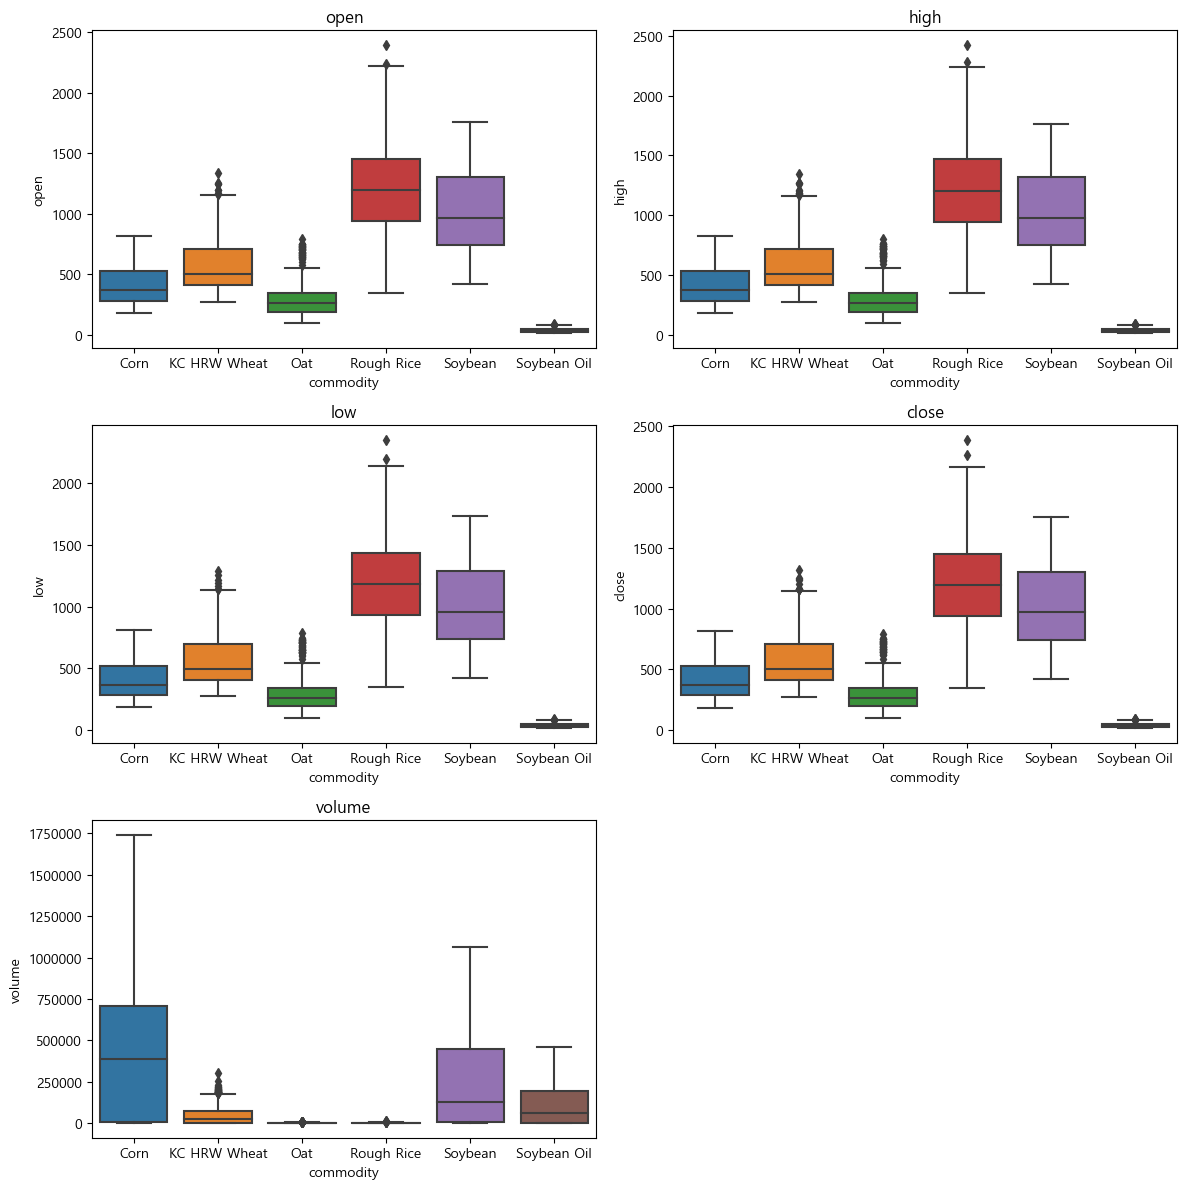

In [8]:
cols = ['open', 'high', 'low', 'close', 'volume']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, col in enumerate(cols):
    sns.boxplot(x='commodity', y=col, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].ticklabel_format(style='plain', axis='y')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

### line graph 

- The distribution form of each variable can be identified  
  using the above summary statistics and boxplots.  
  But this distribution does not show volatility, trends, or seasonality over time.
- Changes over time can be viewed as a line graph.
- The changes over time in the 'close', 'open', 'high', and 'low' columns are almost similar.  
  When using these redundant columns together in machine learning/deep learning,  
  problems of multicollinearity and overfitting may occur.
- Looking at the line graph, prices are highly volatile,  
  and it is difficult to see a steady upward trend from 2010 to 2023.  
- This needs to be analyzed by breaking it down into Trend, Seasonal, and Residual    
  using Time Decomposition.

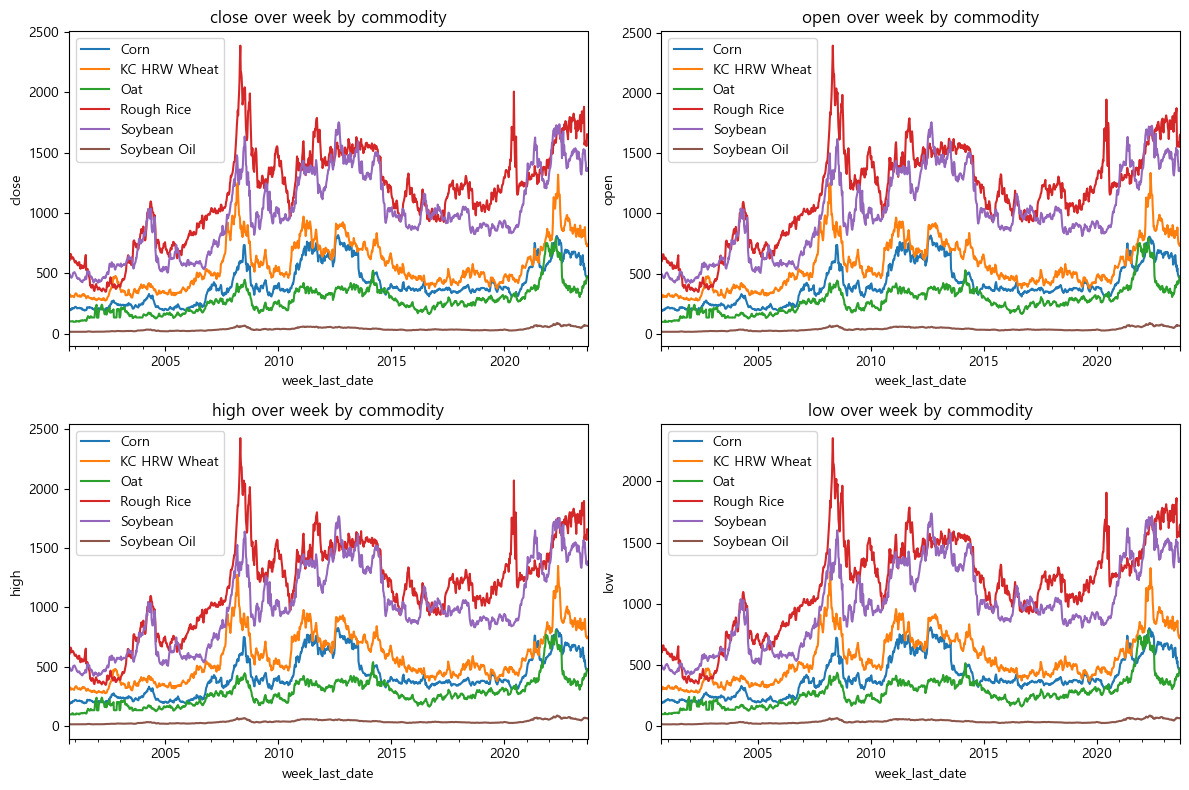

In [9]:
cols = ['close', 'open', 'high', 'low']
pivot_dfs = [df.pivot(index='week_last_date', columns='commodity', values=col) for col in cols]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
positions = [(0,0), (0,1), (1,0), (1,1)]

for idx, ((row, col), pivot_df, col_name) in enumerate(zip(positions, pivot_dfs, cols)):
    ax = axes[row, col]
    pivot_df.plot(ax=ax)
    ax.set_title(f'{col_name} over week by commodity')
    ax.set_ylabel(col_name)
    ax.legend()

plt.tight_layout()
plt.show()

### stacked area chart

- By drawing a stacked area chart for 'volume', can check the overall trend    
  and intuitively check the proportion of each commodity in the same weekly transaction.
- Because the total period of data is long and the volatility of trading volume is large,  
  it is difficult to see meaningful information in the first graph.
- can check this more intuitively by drawing a graph for each year, as shown in the second graph.

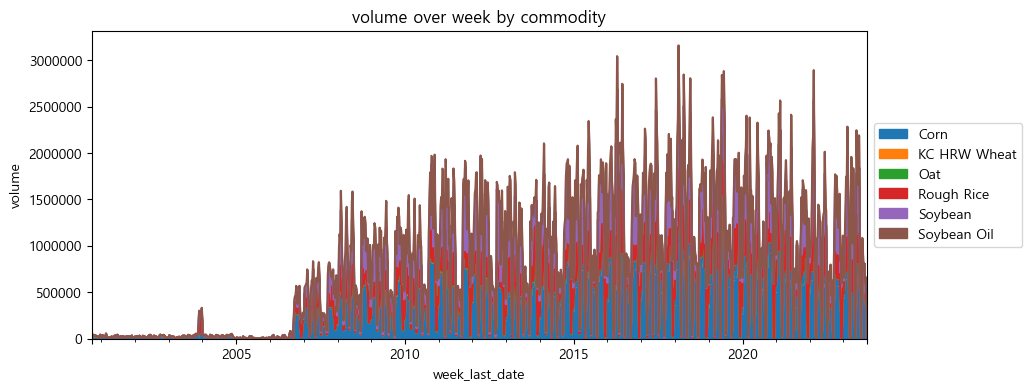

In [10]:
volume_pivot_df = df.pivot(index='week_last_date', columns='commodity', values='volume')

ax = volume_pivot_df.plot(kind='area', stacked=True, figsize=(10, 4))

ax.set_title('volume over week by commodity')
ax.set_ylabel('volume')
ax.ticklabel_format(style='plain', axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

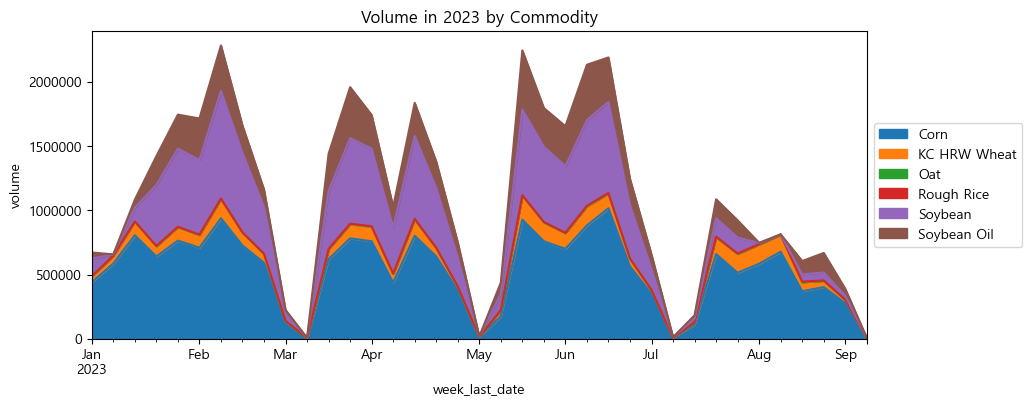

In [11]:
y = 2023

volume_pivot_df_y = volume_pivot_df[volume_pivot_df.index.year == y]

ax = volume_pivot_df_y.plot(kind='area', stacked=True, figsize=(10, 4))

ax.set_title(f'Volume in {y} by Commodity')
ax.set_ylabel('volume')
ax.ticklabel_format(style='plain', axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### scatterplot and correlation heatmap
- Draw a scatterplot and correlation heatmap  
  to check the relationship between trading volume and close price.
- When looking at a scatterplot,  
  it is difficult to visually confirm the relationship between trading volume and close price.
- However, looking at the correlation coefficient figures in the heat map,  
  it appears that there is a positive correlation except for 'KC HRW Wheat'.

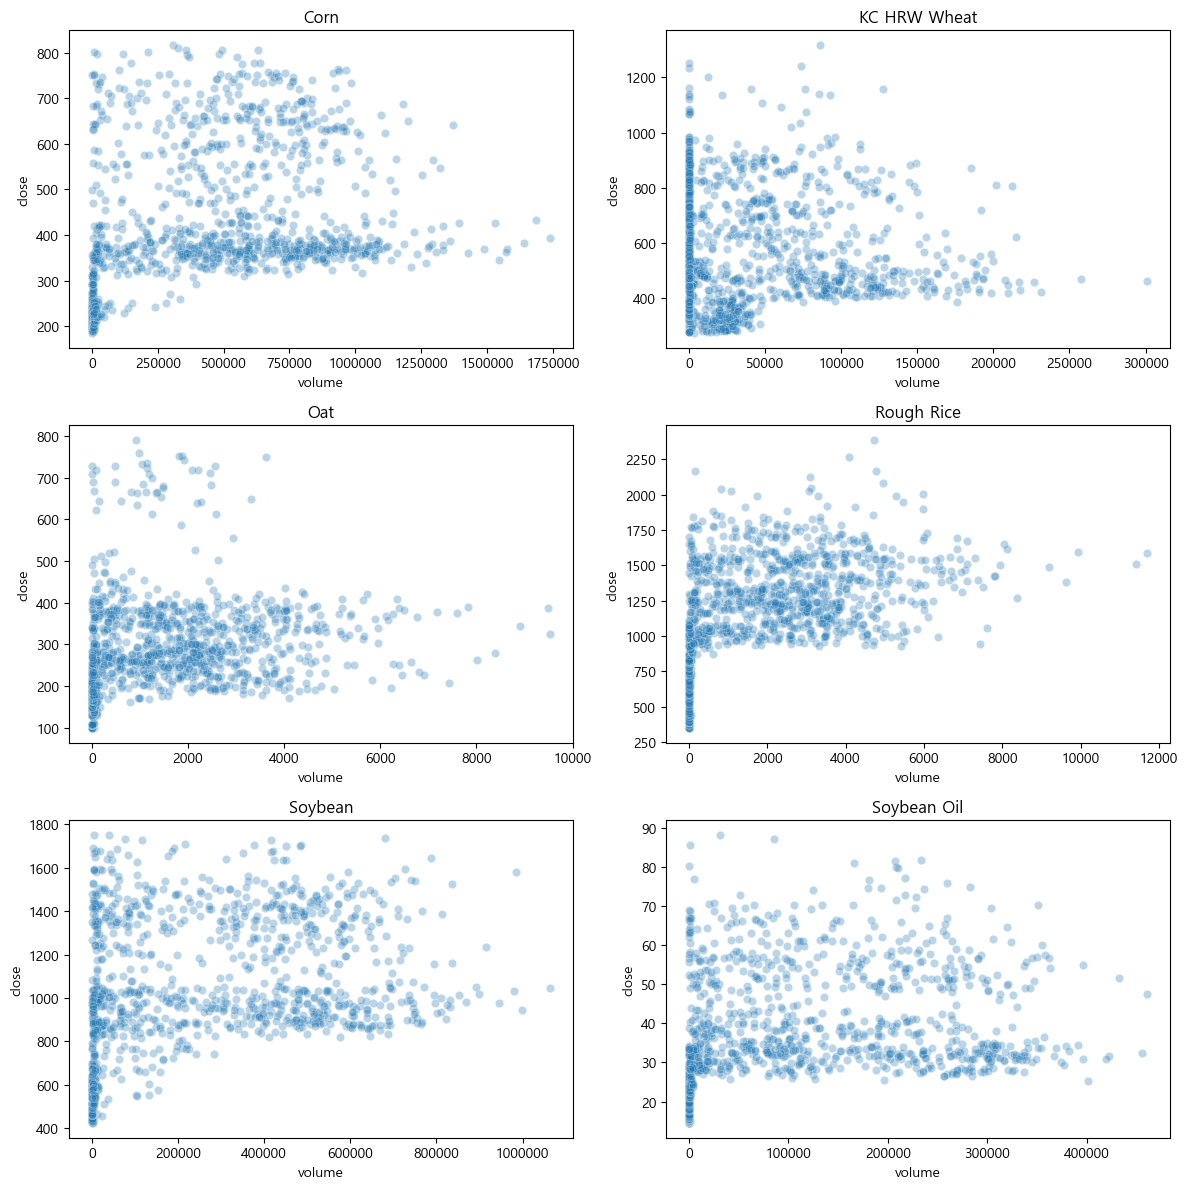

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, commodity in enumerate(commodities):
    ax = axes[i//2, i%2]
    sns.scatterplot(data=df[df['commodity'] == commodity], x='volume', y='close', ax=ax, alpha=0.3)
    ax.set_title(commodity)
    ax.ticklabel_format(style='plain', axis='x') 

plt.tight_layout()
plt.show()

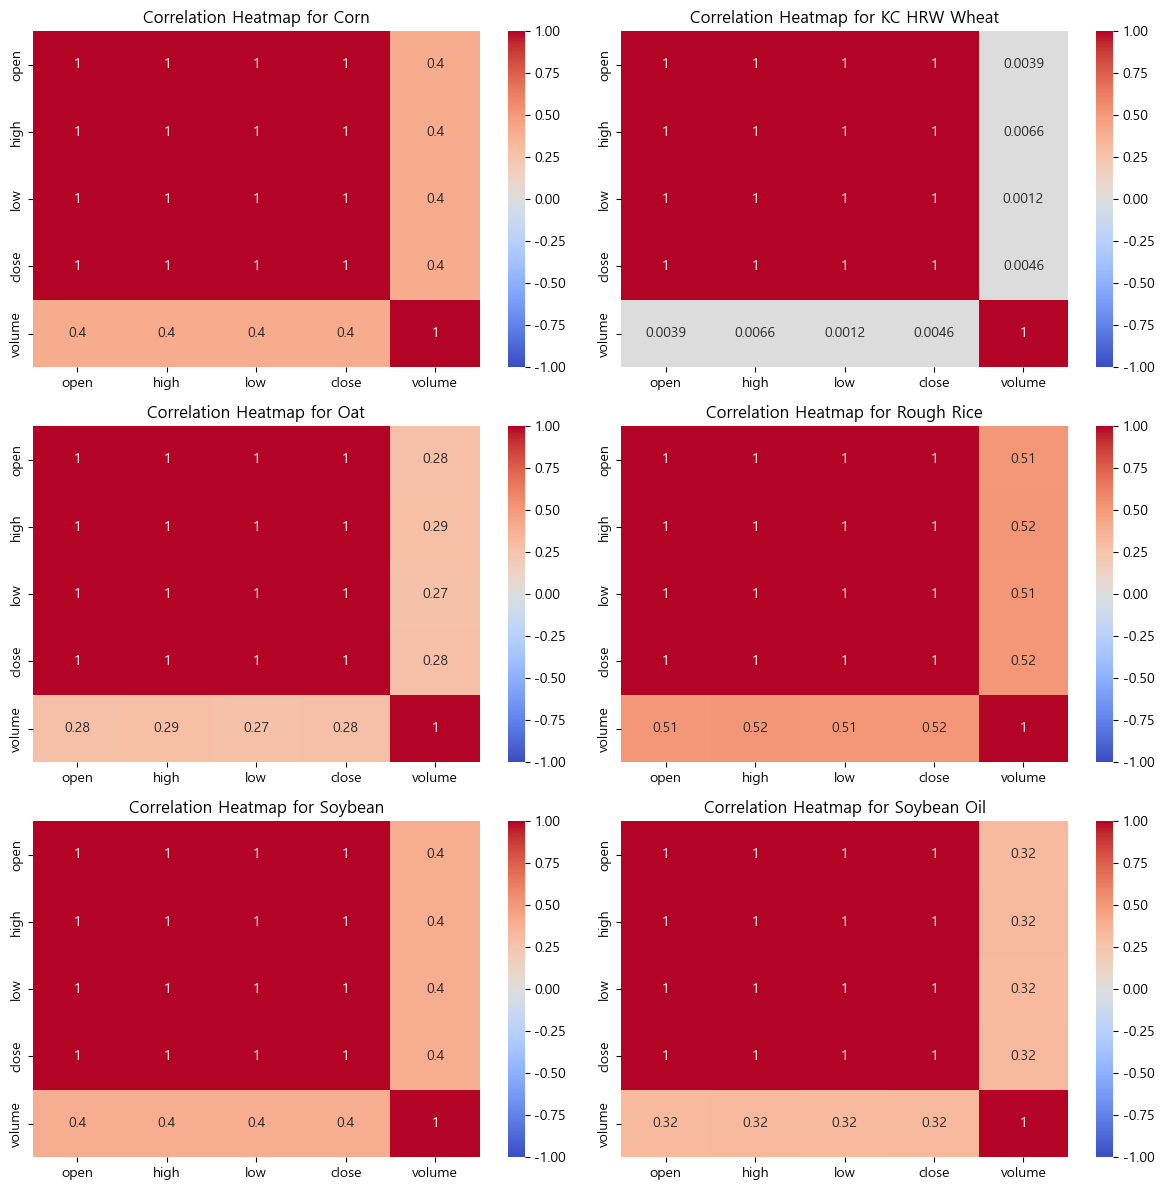

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, commodity in enumerate(commodities):
    ax = axes[i//2, i%2]
    
    subset = df[df['commodity'] == commodity].select_dtypes(include=[float, int])
    corr = subset.corr()  
    
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(f'Correlation Heatmap for {commodity}')

plt.tight_layout()
plt.show()